# Load and Parse JSON Data
Use json module to load the polygon data and extract the image filename, segmentation coordinates, and confidence score.

In [5]:
import json
import os

data_file_path = 'output/segmentations_20250311.json'

# Load the JSON data from the file
with open(data_file_path) as f:
    data = json.load(f)
    data = data[0] # just get the first image as an example

# Extract the image filename, segmentation coordinates, and confidence score
image_filename = data['image']
segmentation_coords = data['segmentation']
confidence_score = data['confidence_score']

# Print the extracted data for verification
print(f"Image Filename: {image_filename}")
print(f"Segmentation Coordinates: {segmentation_coords}")
print(f"Confidence Score: {confidence_score}")

Image Filename: 1738856794439.jpg
Segmentation Coordinates: [1238, 718, 1237, 717, 1237, 716, 1236, 716, 1234, 714, 1232, 714, 1230, 712, 1230, 711, 1229, 711, 1228, 710, 1226, 710, 1225, 709, 1224, 709, 1223, 708, 1222, 708, 1221, 707, 1220, 707, 1217, 704, 1217, 702, 1216, 701, 1214, 701, 1213, 700, 1213, 699, 1212, 698, 1207, 698, 1202, 693, 1200, 693, 1199, 692, 1199, 691, 1195, 687, 1193, 687, 1192, 686, 1190, 686, 1182, 678, 1182, 677, 1181, 676, 1179, 676, 1177, 674, 1177, 673, 1175, 673, 1172, 670, 1170, 670, 1167, 667, 1165, 667, 1163, 665, 1162, 665, 1161, 664, 1160, 664, 1158, 662, 1158, 661, 1157, 660, 1156, 660, 1153, 657, 1152, 657, 1151, 656, 1151, 654, 1150, 654, 1149, 653, 1148, 653, 1147, 652, 1146, 652, 1144, 650, 1144, 649, 1142, 647, 1141, 647, 1138, 644, 1138, 643, 1136, 641, 1134, 641, 1133, 640, 1132, 640, 1130, 638, 1130, 637, 1128, 635, 1128, 634, 1127, 633, 1127, 632, 1126, 631, 1124, 631, 1121, 628, 1120, 628, 1117, 625, 1117, 622, 1115, 622, 1113, 620, 1112

# Load and Display Image
Use PIL or opencv-python to load and display the source image using matplotlib.

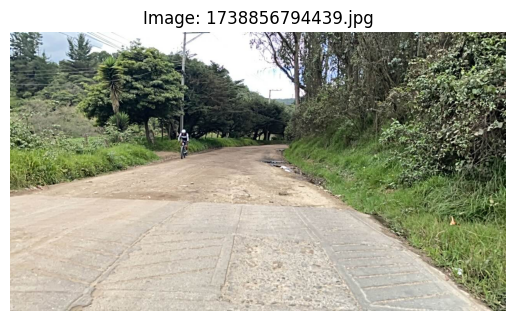

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = f'input/test_images/{image_filename}'

# Load the image using matplotlib
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.title(f"Image: {image_filename}")
plt.axis('off')  # Hide the axis
plt.show()

# Convert Segmentation Points to Polygon
Convert the segmentation array into numpy arrays of x,y coordinates and create a matplotlib polygon patch.

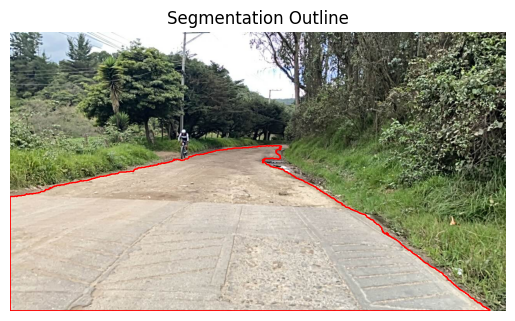

In [7]:
import numpy as np
import matplotlib.patches as patches

# Convert the segmentation array into numpy arrays of x, y coordinates
segmentation_coords = np.array(segmentation_coords).reshape(-1, 2)
x_coords, y_coords = segmentation_coords[:, 0], segmentation_coords[:, 1]

# Create a matplotlib polygon patch
polygon = patches.Polygon(segmentation_coords, closed=True, edgecolor='r', facecolor='none')

# Display the image with the polygon overlay
fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch(polygon)
plt.title(f"Segmentation Outline")
plt.axis('off')  # Hide the axis
plt.show()

# Overlay Segmentation on Image
Create a matplotlib figure and add the polygon overlay on top of the image with semi-transparency.

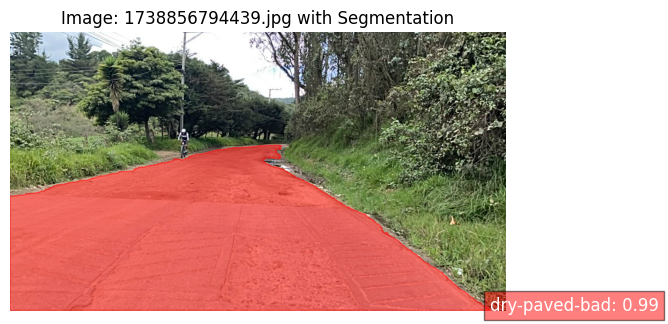

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.patches as patches

# Load the image using matplotlib
img = mpimg.imread(img_path)

# Convert the segmentation array into numpy arrays of x, y coordinates
segmentation_coords = np.array(segmentation_coords).reshape(-1, 2)
x_coords, y_coords = segmentation_coords[:, 0], segmentation_coords[:, 1]
# Add text annotation showing the confidence score and class label
class_label = data['class']
confidence_score = data['confidence_score']

# Create a matplotlib polygon patch with semi-transparency
polygon = patches.Polygon(segmentation_coords, closed=True, edgecolor='r', facecolor='r', alpha=0.5)

# Display the image with the polygon overlay
fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch(polygon)
plt.title(f"Image: {image_filename} with Segmentation")
plt.axis('off')  # Hide the axis

# Add text annotation for confidence score and class label
text_x, text_y = x_coords[0], y_coords[0]  # Position the text at the first coordinate of the segmentation
ax.text(text_x, text_y, f"{class_label}: {confidence_score:.2f}", color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.show()